In [1]:
from auxiliar import get_train_set, plot_roc_curve
from preprocessing import apply_OHE, reduce_by_frequency_occurrence, feature_engineering, preprocesado1

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
def plot_roc(_fpr, _tpr, x):

    roc_auc = auc(_fpr, _tpr)

    plt.figure(figsize=(10, 7))
    plt.plot(
        _fpr, _tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})'
    )
    plt.scatter(_fpr, x)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

<h1>Random Forest</h1>

<h3> Preprocesamiento OHE y Reducción de las columnas Barrio y Religion </h3>

In [3]:
X, y = get_train_set()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.2, stratify=y
)

In [4]:
X_train

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,trabajo
29101,14,palermo,no_especificada,19,5_anio,sin_matrimonio,0,mujer,30,cristianismo,otro,no_especificado
10606,14,palermo,relacion_de_dependencia,50,5_anio,matrimonio_civil,0,hombre,40,cristianismo,casado,inspector
9414,14,palermo,relacion_de_dependencia,62,5_anio,matrimonio_civil,0,hombre,40,cristianismo,casado,directivo_gerente
1747,13,palermo,relacion_de_dependencia,20,4_anio,sin_matrimonio,0,mujer,40,cristianismo,sin_familia,entretenimiento
10677,17,palermo,relacion_de_dependencia,25,universidad_3_anio,sin_matrimonio,0,mujer,40,cristianismo,con_hijos,entretenimiento
...,...,...,...,...,...,...,...,...,...,...,...,...
11465,13,palermo,relacion_de_dependencia,49,4_anio,matrimonio_civil,0,hombre,40,cristianismo,casado,reparador
15326,18,palermo,empleado_municipal,32,universidad_4_anio,matrimonio_civil,0,hombre,48,cristianismo,casado,profesional_especializado
284,13,palermo,relacion_de_dependencia,21,4_anio,sin_matrimonio,0,hombre,40,cristianismo,con_hijos,limpiador
13784,19,palermo,no_especificada,73,universiada_5_anio,matrimonio_civil,0,hombre,40,cristianismo,casado,no_especificado


In [5]:
enc = OneHotEncoder(drop='first')

In [6]:
enc.fit(X_train)

OneHotEncoder(drop='first')

In [7]:
X_train_enc = enc.transform(X_train)

In [8]:
X_train_enc

<26048x473 sparse matrix of type '<class 'numpy.float64'>'
	with 285404 stored elements in Compressed Sparse Row format>

In [9]:
X_train_enc = pd.DataFrame(X_train_enc.toarray(), columns=enc.get_feature_names(X.columns))

In [10]:
X_train_enc

,anios_estudiados_4,anios_estudiados_6,anios_estudiados_8,anios_estudiados_9,anios_estudiados_10,anios_estudiados_11,anios_estudiados_12,anios_estudiados_13,anios_estudiados_14,anios_estudiados_15,...,trabajo_no_especificado,trabajo_otros,trabajo_profesional_especializado,trabajo_reparador,trabajo_sector_primario,trabajo_seguridad,trabajo_servicio_domestico,trabajo_soporte_tecnico,trabajo_transporte,trabajo_ventas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
Z = X_test.sample(1)
Z

,anios_estudiados,barrio,categoria_de_trabajo,edad,educacion_alcanzada,estado_marital,ganancia_perdida_declarada_bolsa_argentina,genero,horas_trabajo_registradas,religion,rol_familiar_registrado,trabajo
26514,14,palermo,relacion_de_dependencia,27,5_anio,matrimonio_civil,0,hombre,40,cristianismo,casado,soporte_tecnico


In [12]:
Z_aux = enc.transform(Z)

In [14]:
Z_aux = pd.DataFrame(Z_aux.toarray(), columns=enc.get_feature_names(X.columns))

In [15]:
Z_aux

,anios_estudiados_4,anios_estudiados_6,anios_estudiados_8,anios_estudiados_9,anios_estudiados_10,anios_estudiados_11,anios_estudiados_12,anios_estudiados_13,anios_estudiados_14,anios_estudiados_15,...,trabajo_no_especificado,trabajo_otros,trabajo_profesional_especializado,trabajo_reparador,trabajo_sector_primario,trabajo_seguridad,trabajo_servicio_domestico,trabajo_soporte_tecnico,trabajo_transporte,trabajo_ventas
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [18]:
X["barrio"].value_counts()

palermo                29170
belgrano                 643
otro                     583
san isidro               198
villa urquiza            137
recoleta                 121
la boca                  114
agronomia                106
almagro                  100
balvanera                 95
puerto madero             90
caballito                 81
boedo                     80
barracas                  75
chacarita                 73
coghland                  70
floresta                  67
constitucion              64
colegiales                62
flores                    60
liniers                   59
monte castro              51
mataderos                 44
nueva pompeya             43
monserrat                 37
nuñez                     34
parque chacabuco          31
parque avellaneda         29
villa luro                29
parque chas               28
la paternal               24
retiro                    20
villa devoto              19
villa soldati             19
san telmo     

,anios_estudiados,edad,ganancia_perdida_declarada_bolsa_argentina,horas_trabajo_registradas,barrio_palermo,categoria_de_trabajo_empleado_municipal,categoria_de_trabajo_empleado_provincial,categoria_de_trabajo_monotributista,categoria_de_trabajo_no_especificada,categoria_de_trabajo_relacion_de_dependencia,...,trabajo_profesional_especializado,trabajo_reparador,trabajo_sector_primario,trabajo_seguridad,trabajo_servicio_domestico,trabajo_soporte_tecnico,trabajo_transporte,trabajo_ventas,balance_Neutro,balance_Positivo
0,17,39,2174,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,17,50,0,13,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,13,38,0,40,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,11,53,0,40,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,17,28,0,40,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,16,27,0,38,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
32557,13,40,0,40,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
32558,13,58,0,40,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
32559,13,22,0,20,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [3]:
X_train, X_test, y_train, y_test = get_train_validation()
y_train = y_train.loc[:,'tiene_alto_valor_adquisitivo']
y_test = y_test.loc[:,'tiene_alto_valor_adquisitivo']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.2, stratify=y
)

In [4]:
X_train = apply_OHE(X_train)
X_test = apply_OHE(X_test)

In [10]:
#'criterion': ['gini'], 'max_depth': np.arange(5, 6), 'min_samples_leaf': np.arange(35, 46), 'n_estimators': np.arange(1, 1001, 10), 'max_features': ['sqrt']

parameters = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(10, 21), 'max_features': ['sqrt', 'log2']}

clf = RandomForestClassifier(random_state = 0)

gscv = GridSearchCV(
    clf, parameters, scoring='roc_auc', cv=5, return_train_score=True
).fit(X_train, y_train)

In [ ]:
"""
params = {'max_depth': np.arange(1, 31), 'min_samples_leaf': np.arange(1, 16)}

clf = DecisionTreeClassifier(random_state=117)

gscv = GridSearchCV(
    clf, params, scoring='accuracy', n_jobs=-1, cv=5, return_train_score=True
).fit(X, y)
"""

In [11]:
print(f"Best score: {gscv.best_score_}")
print(f"Best params {gscv.best_params_}")

Best score: 0.9158555393975446
Best params {'criterion': 'entropy', 'max_depth': 17, 'max_features': 'sqrt'}


In [12]:
rng_frt = gscv.best_estimator_
rng_frt

RandomForestClassifier(criterion='entropy', max_depth=17, max_features='sqrt',
                       random_state=0)

In [13]:
"""
y_pred = rng_frt.predict(X_test)
accuracy_score(y_pred, y_test)
"""
print(f"test score: {rng_frt.score(X_test, y_test)}")

test score: 0.8613542146476278


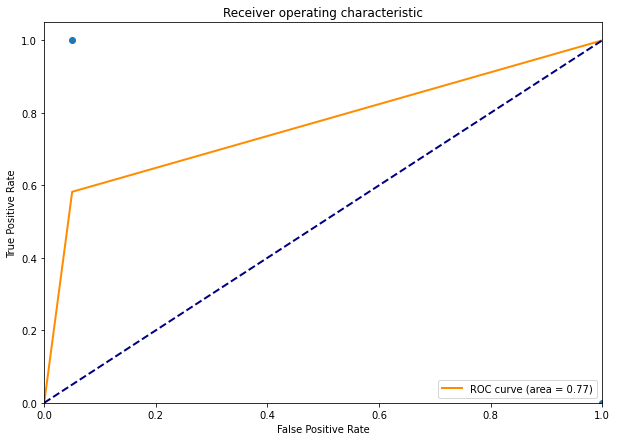

0.7660593699056973

In [28]:
y_pred = rng_frt.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc(fpr, tpr, thresholds)
display(roc_auc_score(y_test, y_pred))

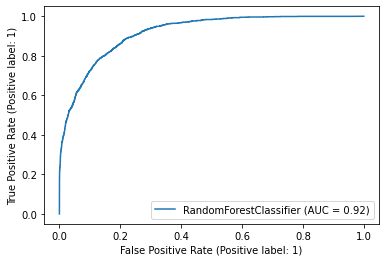

In [31]:
plot_roc_curve(rng_frt, X_test, y_test, response_method="predict_proba")
plt.show()

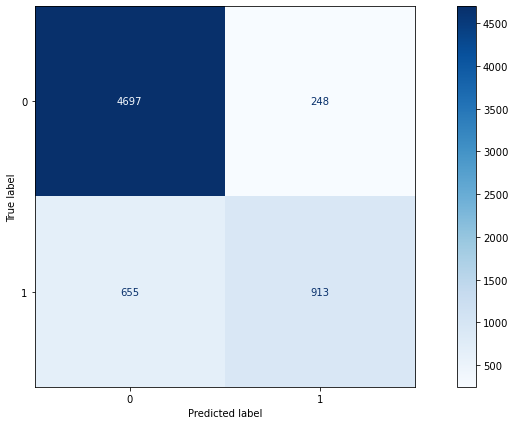

In [29]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.grid(False)
plot_confusion_matrix(
    rng_frt, X_test, y_test, cmap=plt.cm.Blues, display_labels=['0', '1'], ax=ax
)
plt.show()

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4945
           1       0.79      0.58      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.83      0.77      0.79      6513
weighted avg       0.86      0.86      0.85      6513



In [18]:
calibrated_clf = CalibratedClassifierCV(base_estimator=rng_frt, cv="prefit")
calibrated_clf.fit(X_test, y_test)

CalibratedClassifierCV(base_estimator=RandomForestClassifier(criterion='entropy',
                                                             max_depth=17,
                                                             max_features='sqrt',
                                                             random_state=0),
                       cv='prefit')

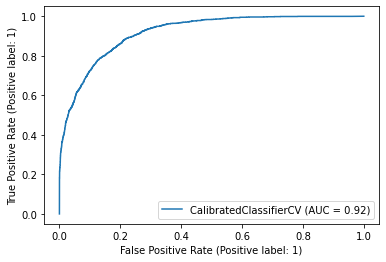

In [32]:
plot_roc_curve(calibrated_clf, X_test, y_test, response_method="predict_proba")
plt.show()

In [33]:
print(f"test score: {calibrated_clf.score(X_test, y_test)}")

test score: 0.8628896054045755


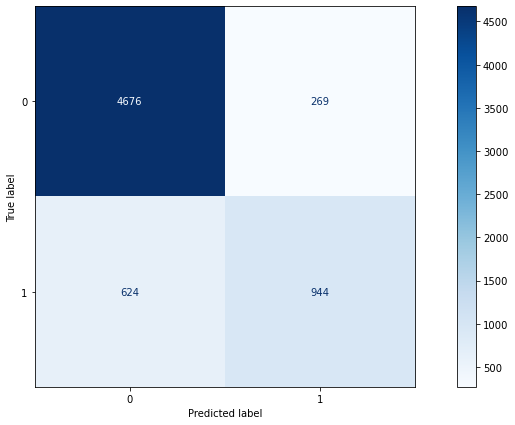

In [34]:
fig, ax = plt.subplots(figsize=(15, 7))
plt.grid(False)
plot_confusion_matrix(
    calibrated_clf, X_test, y_test, cmap=plt.cm.Blues, display_labels=['0', '1'], ax=ax
)
plt.show()

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4945
           1       0.79      0.58      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.83      0.77      0.79      6513
weighted avg       0.86      0.86      0.85      6513



In [36]:
rng_frt.predict_proba(X_test)

array([[0.9754231 , 0.0245769 ],
       [0.9921524 , 0.0078476 ],
       [0.94600973, 0.05399027],
       ...,
       [0.8699538 , 0.1300462 ],
       [0.51564452, 0.48435548],
       [0.9941788 , 0.0058212 ]])

In [37]:
calibrated_clf.predict_proba(X_test)

array([[0.9651074 , 0.0348926 ],
       [0.9689501 , 0.0310499 ],
       [0.95721473, 0.04278527],
       ...,
       [0.92819678, 0.07180322],
       [0.5010041 , 0.4989959 ],
       [0.96938678, 0.03061322]])

In [ ]:
"""
with plt.style.context("classic"):
    plt.figure(figsize=(20, 10))
    plot_tree(model_rfr.estimators_[0], filled=True, class_names=["no alto V", "alto V"])
    #feature_names=list(X_train.columns)
"""